<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 8: Data Processing & Cleaning for Data Science: Statistics For Data Science

The purpose of this [Jupyter Notebook] is to getting you familairized with Statistics For Data Science

#  Bayes' law
Use Bayes’ law to calculate the probability of getting a data science job if you’ve gotten an interview for the job. This could be written P(get the DS job | interview). You’ll have to use Bayesian probability methods (your intuition or beliefs) to assign values to the different components of Bayes’ law.

`Hint:`
* Usually the probability of getting a job from applying is very low, around 1%. This is based on experience and reading about how most people apply to 100 jobs in order to get 1 job. 
* P(interview | get job) is 99%. Almost no one will hire someone they didn't interview. 
* P(interview | !get job) will be set to 10%. We might interview 10% of candidates, and only one gets the job.

In [73]:
P_A = 0.01  # Probability of getting the job 1%
P_B_given_A = 0.99  # Probability of interview if you get the job 99%
P_B_given_not_A = 0.10  # Probability of interview if you don't get the job 10%
P_not_A = 1 - P_A

# Total probability of interview P(B)
P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)

# Bayes' law to calculate P(A | B)
P_A_given_B = (P_B_given_A * P_A) / P_B

print(f"P(get DS job | interview) = {P_A_given_B:.4f} (or {P_A_given_B * 100:.2f}%)")


P(get DS job | interview) = 0.0909 (or 9.09%)


#  Probabilities Distributions

Re-test the codes seen in lecture 8 from slide 6 to 18.


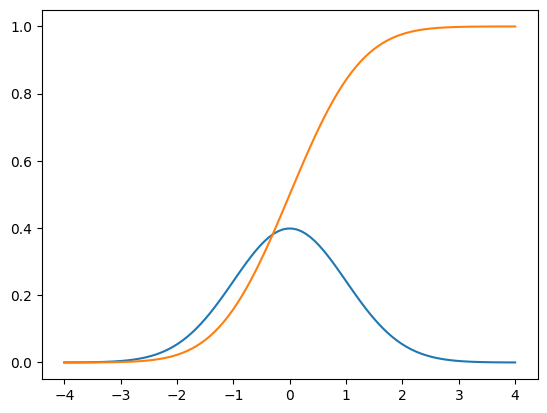

In [74]:
import numpy as np
from scipy.stats import norm
import scipy
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.cdf(x))

(array([3.000e+00, 1.000e+00, 6.000e+00, 1.300e+01, 2.800e+01, 4.700e+01,
        8.100e+01, 1.710e+02, 2.330e+02, 3.970e+02, 5.040e+02, 7.040e+02,
        8.330e+02, 9.540e+02, 1.044e+03, 1.027e+03, 9.880e+02, 8.290e+02,
        6.500e+02, 5.260e+02, 3.670e+02, 2.590e+02, 1.580e+02, 8.100e+01,
        4.900e+01, 2.400e+01, 1.500e+01, 5.000e+00, 1.000e+00, 2.000e+00]),
 array([-3.92240025e+00, -3.66077899e+00, -3.39915772e+00, -3.13753646e+00,
        -2.87591519e+00, -2.61429393e+00, -2.35267266e+00, -2.09105139e+00,
        -1.82943013e+00, -1.56780886e+00, -1.30618760e+00, -1.04456633e+00,
        -7.82945068e-01, -5.21323803e-01, -2.59702538e-01,  1.91872741e-03,
         2.63539993e-01,  5.25161258e-01,  7.86782523e-01,  1.04840379e+00,
         1.31002505e+00,  1.57164632e+00,  1.83326758e+00,  2.09488885e+00,
         2.35651011e+00,  2.61813138e+00,  2.87975265e+00,  3.14137391e+00,
         3.40299518e+00,  3.66461644e+00,  3.92623771e+00]),
 <BarContainer object of 30 artists

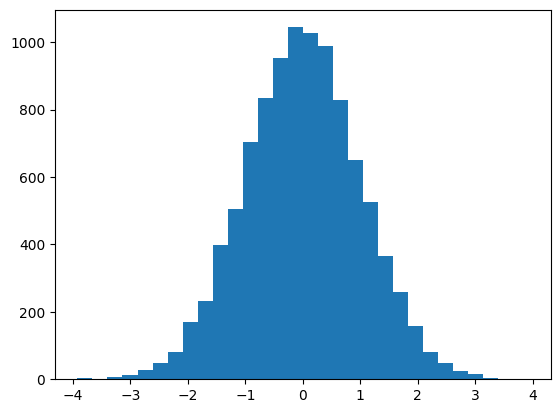

In [75]:
data = norm.rvs(size=10000, random_state=42)
plt.hist(data, bins=30)

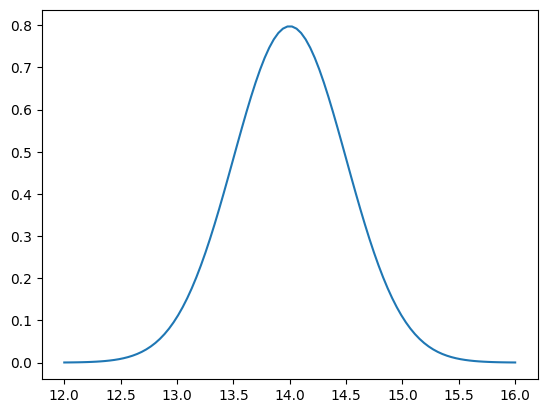

In [76]:
x = np.linspace(12, 16, 100)
plt.plot(x, norm.pdf(x, loc=14, scale=0.5))

In [77]:
data = norm.rvs(size=10000, loc=14, scale=0.5,
random_state=42)
data.mean()
data.std()

np.float64(0.5017061030649937)

In [78]:
import pandas as pd
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.describe()

,efficiency
count,187196.000000
mean,14.181805
std,0.488751
min,9.691218
25%,13.932445
50%,14.205567
75%,14.482341
max,17.578530


In [79]:
scipy.stats.norm.fit(df['efficiency'])

(np.float64(14.181805365742568), np.float64(0.4887500401256815))

In [80]:
scipy.stats.bernoulli(p=0.7).rvs()

1

<BarContainer object of 11 artists>

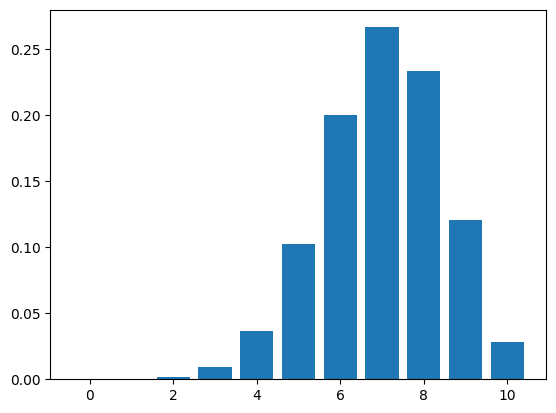

In [81]:
binom_dist = scipy.stats.binom(p=0.7, n=10)
plt.bar(range(11), binom_dist.pmf(k=range(11)))

In [82]:
r = scipy.stats.uniform.rvs(size=1000)

[Text(1.6749999999999998, 0.18734072526020495, 'λ=1'),
 Text(3.3249999999999993, 6.717692318475326e-06, 'λ=4')]

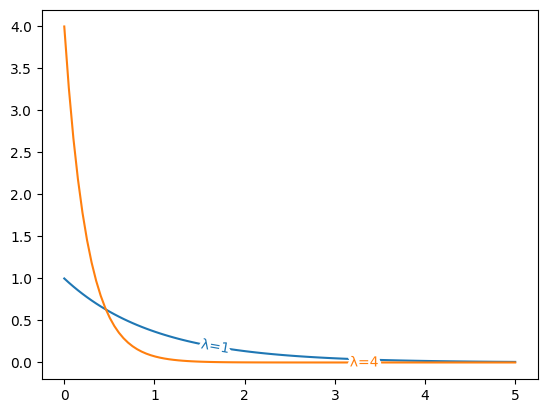

In [83]:
from labellines import labelLines
x = np.linspace(0, 5, 100)
plt.plot(x, scipy.stats.expon.pdf(x, scale=1), label='λ=1')
plt.plot(x, scipy.stats.expon.pdf(x, scale=0.25), label='λ=4')
labelLines(plt.gca().get_lines())

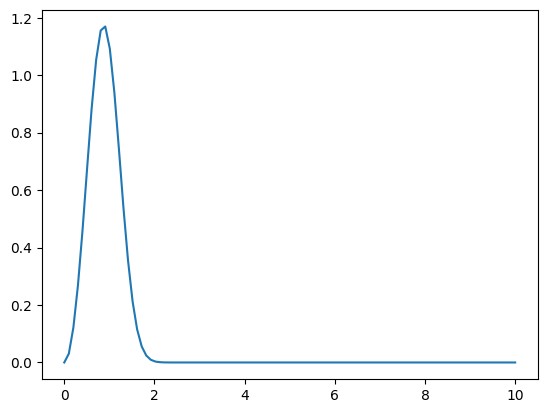

In [84]:
x = np.linspace(0, 10, 100)
plt.plot(x, scipy.stats.weibull_min(c=3).pdf(x))

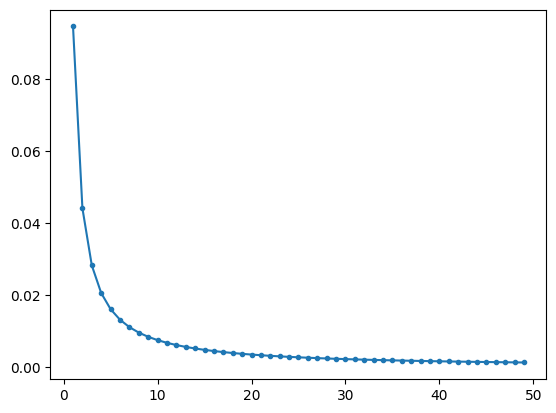

In [85]:
x = range(1, 50)
plt.plot(x, scipy.stats.zipf(a=1.1).pmf(x), marker='.')

In [86]:
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.sample(100, random_state=42)

,efficiency
87591,13.405397
158602,14.404034
107515,14.458128
116535,14.260624
184959,14.336878
...,...
158398,14.292562
32960,14.725099
29208,14.186570
175322,14.054062


<Axes: ylabel='Count'>

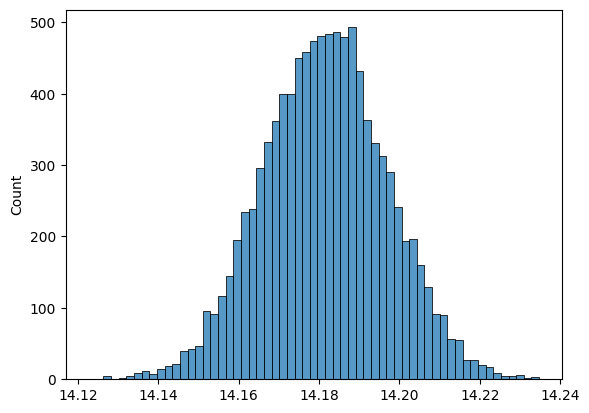

In [87]:
import seaborn as sns
means = []
for i in range(10000):
    sample = np.random.choice(df['efficiency'], 1000,
    replace=True)
    means.append(sample.mean())
sns.histplot(means)

# MISO distributions
Determine the type of distribution and extract the distribution's PDF parameters from the MISO wind power generation data (the MWh column), stored under  data/miso_wind_data.csv. Write a short analysis explaining why you chose that distribution and what the parameters mean.

`Hint:`
Try to fit your data with different probabilities distributions and see what one works better.



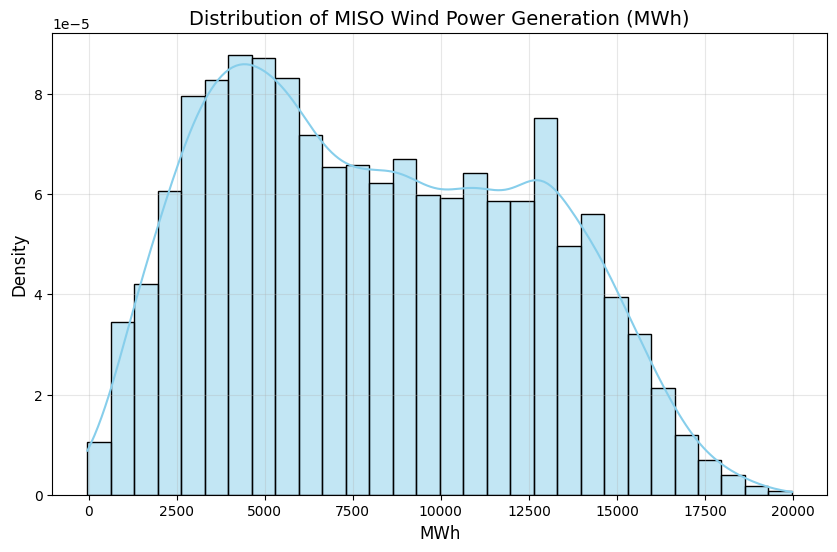

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = './data/miso_wind_data.csv'
data = pd.read_csv(file_path)

# Convert MWh column to numeric and drop NaN values
mwh_data = pd.to_numeric(data['MWh'], errors='coerce').dropna()

# Plot the histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(mwh_data, kde=True, bins=30, color='skyblue', stat="density")
plt.title('Distribution of MISO Wind Power Generation (MWh)', fontsize=14)
plt.xlabel('MWh', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


Best fit: weibull_min with parameters (np.float64(2.0768052908037644), np.float64(-445.1744294553837), np.float64(9701.000246379008))


C:\Users\houss\AppData\Local\Temp\ipykernel_14828\3262636570.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


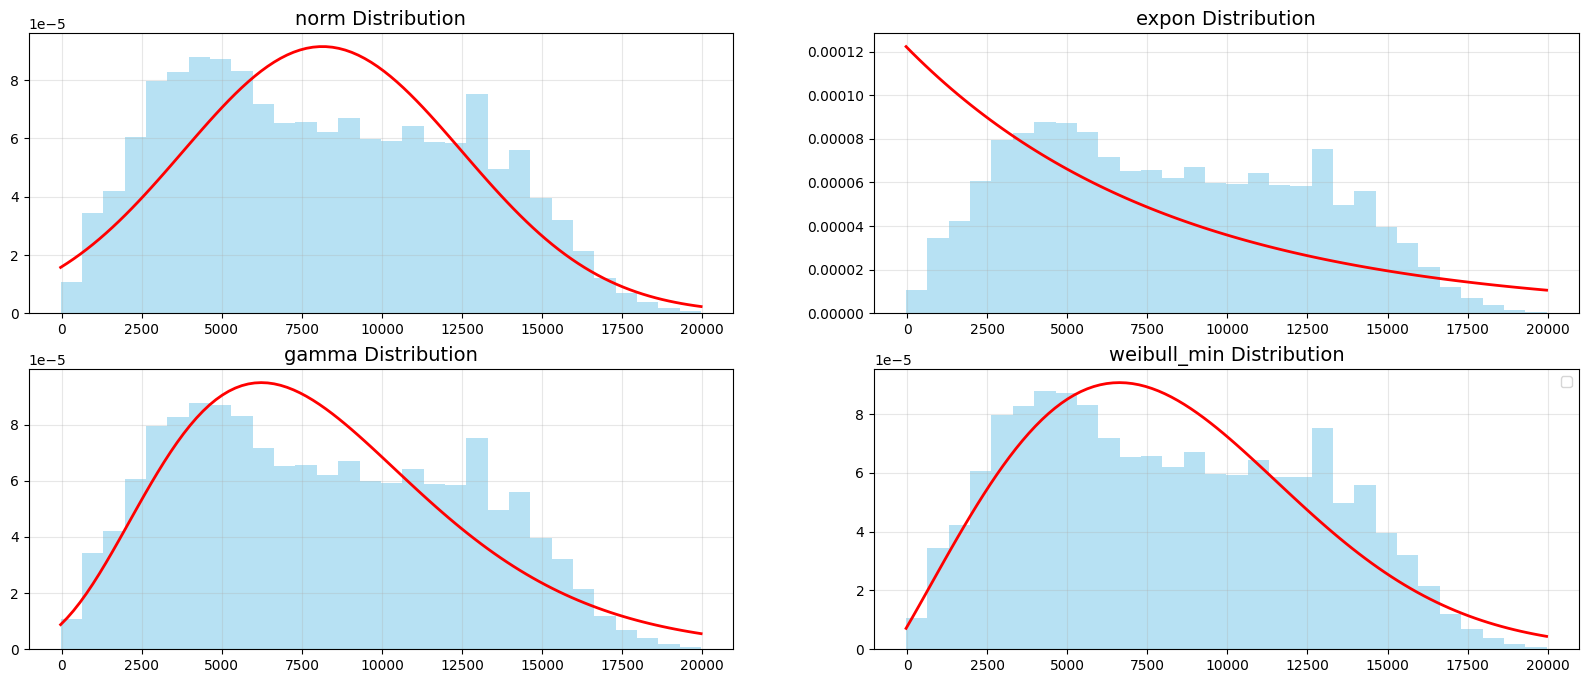

In [89]:

distributions = ['norm', 'expon', 'gamma', 'weibull_min']
results = {}

for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(mwh_data)

    log_likelihood = np.sum(dist.logpdf(mwh_data, *params))
    results[dist_name] = {'params': params, 'log_likelihood': log_likelihood}


sorted_results = sorted(results.items(), key=lambda x: x[1]['log_likelihood'], reverse=True)


best_fit = sorted_results[0]
print(f"Best fit: {best_fit[0]} with parameters {best_fit[1]['params']}")

best_dist = getattr(stats, best_fit[0])
best_params = best_fit[1]['params']
x = np.linspace(mwh_data.min(), mwh_data.max(), 100)
pdf = best_dist.pdf(x, *best_params)


fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes = axes.ravel()
for i, (dist_name, dist_results) in enumerate(results.items()):
    dist = getattr(stats, dist_name)
    params = dist_results['params']
    pdf = dist.pdf(x, *params)
    axes[i].hist(mwh_data, bins=30, density=True, alpha=0.6, color='skyblue')
    axes[i].plot(x, pdf, 'r-', lw=2)
    axes[i].set_title(f'{dist_name} Distribution', fontsize=14)
    axes[i].grid(alpha=0.3)
plt.legend()
plt.grid(alpha=0.3)
plt.show()



# Bootstrap Sampling
Apply bootstrap sampling to the MISO wind power generation data and plot the distribution of the mean wind power generation values.

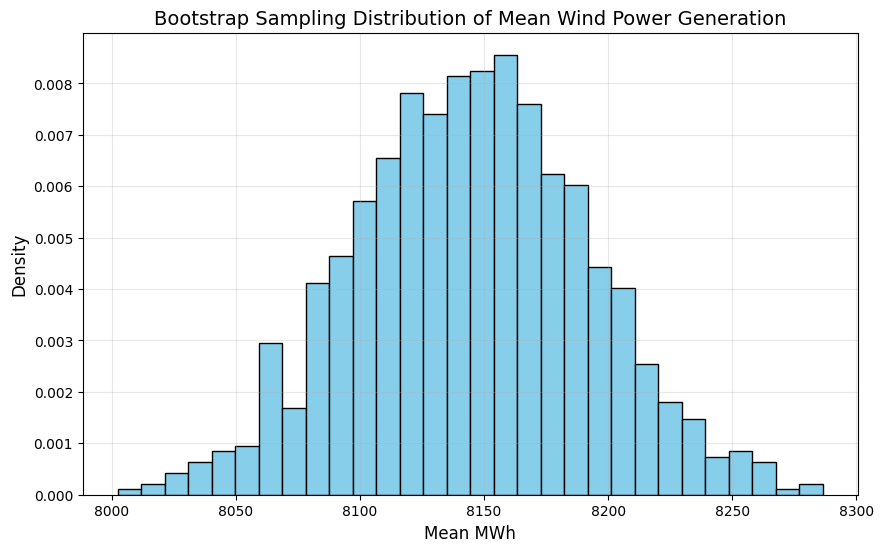

In [90]:
# Load the dataset
file_path = './data/miso_wind_data.csv'
data = pd.read_csv(file_path)

# Convert MWh column to numeric and drop NaN values
mwh_data = pd.to_numeric(data['MWh'], errors='coerce').dropna()

# Bootstrap sampling
n_iterations = 1000  # Number of bootstrap samples
sample_size = len(mwh_data)
bootstrap_means = []

for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(mwh_data, size=sample_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Plot the distribution of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Bootstrap Sampling Distribution of Mean Wind Power Generation', fontsize=14)
plt.xlabel('Mean MWh', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(alpha=0.3)
plt.show()
